 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



Optimal DTW distance: 10.0


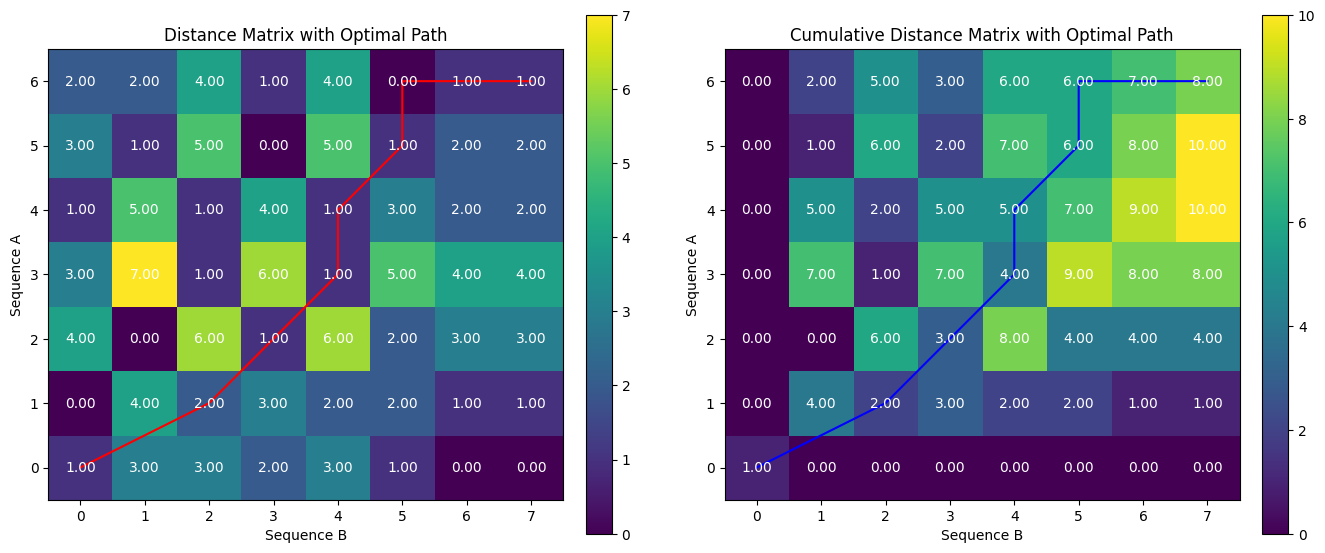

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def distance_matrix(sequence1,sequence2):
  DTW_distance_matrix = np.zeros((len(sequence1), len(sequence2)))
  for i in range(len(sequence1)):
      for j in range(len(sequence2)):
        DTW_distance_matrix[i][j]=abs(sequence1[i]-sequence2[j])
  return DTW_distance_matrix

def cumulative_matrix(sequence1,sequence2,DTW_distance_matrix):
  DTW_cumulative_matrix = np.zeros((len(sequence1), len(sequence2)))
  DTW_cumulative_matrix[0][0] =DTW_distance_matrix[0][0]    #Cummulative distance matrix
  #Iterate through the sequence of points in sequences and compute the distance between the sequences.
  for i in range(1,len(sequence1),1): #you can start from 1
      for j in range(1,len(sequence2),1):
          current_distance = DTW_distance_matrix[i][j]    #Compute the distance between the two points
          addive=min(DTW_cumulative_matrix[i-1,j],DTW_cumulative_matrix[i-1,j-1],DTW_cumulative_matrix[i,j-1])
          DTW_cumulative_matrix[i,j]=current_distance+addive
  return DTW_cumulative_matrix


###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    DTW_distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    DTW_cumulative_matrix = np.zeros((len(sequence1), len(sequence2)))

    # for i in range(len(sequence1)):
    #   for j in range(len(sequence2)):
    #     DTW_distance_matrix[i][j]=abs(sequence1[i]-sequence2[j])
    DTW_distance_matrix=distance_matrix(sequence1,sequence2)




    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    # DTW_cumulative_matrix[0][0] =DTW_distance_matrix[0][0]    #Cummulative distance matrix
    # #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    # for i in range(1,len(sequence1),1): #you can start from 1
    #     for j in range(1,len(sequence2),1):
    #         current_distance = DTW_distance_matrix[i][j]    #Compute the distance between the two points
    #         addive=min(DTW_cumulative_matrix[i-1,j],DTW_cumulative_matrix[i-1,j-1],DTW_cumulative_matrix[i,j-1])
    #         DTW_cumulative_matrix[i,j]=current_distance+addive
    DTW_cumulative_matrix=cumulative_matrix(sequence1,sequence2,DTW_distance_matrix)

            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"








    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i = len(sequence1)-1  # length of the sequence1
    j = len(sequence2)-1  # length of the sequence2
    path = []
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        path.append((i, j))
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            if DTW_cumulative_matrix[i-1, j] == min(DTW_cumulative_matrix[i-1, j], DTW_cumulative_matrix[i-1, j-1], DTW_cumulative_matrix[i, j-1]):
                i -= 1
            elif DTW_cumulative_matrix[i, j-1] == min(DTW_cumulative_matrix[i-1, j], DTW_cumulative_matrix[i-1, j-1], DTW_cumulative_matrix[i, j-1]):
                j -= 1
            else:
                i -= 1
                j -= 1
        # Add the current indexes distance
        opt_distance = opt_distance +DTW_distance_matrix[i, j]    #Compute the distance between the points sequence1[i] and sequence2[j]

    path.append((0,0))

        #Store the required indexes to obtain the optimal path






    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance, path



def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates
    DTW_distance_matrix=distance_matrix(sequence1,sequence2)
    DTW_cumulative_matrix=cumulative_matrix(sequence1,sequence2,DTW_distance_matrix)




    #Obtain the optimal path using "DTW" function
    opt_distance, path = DTW(sequence1, sequence2)



    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    fig = plt.figure(figsize=(16, 8))

    # Plot distance matrix
    ax1 = fig.add_subplot(121)
    im1 = ax1.imshow(DTW_distance_matrix, origin='lower', cmap='viridis', interpolation='nearest')
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            text = ax1.text(j, i, f'{DTW_distance_matrix[i, j]:.2f}', ha='center', va='center', color='white')
    ax1.plot([point[1] for point in path], [point[0] for point in path], color='red')
    ax1.set_title('Distance Matrix with Optimal Path')
    ax1.set_xlabel('Sequence B')
    ax1.set_ylabel('Sequence A')
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    # Plot cumulative distance matrix
    ax2 = fig.add_subplot(122)
    im2 = ax2.imshow(DTW_cumulative_matrix, origin='lower', cmap='viridis', interpolation='nearest')
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            text = ax2.text(j, i, f'{DTW_cumulative_matrix[i, j]:.2f}', ha='center', va='center', color='white')
    ax2.plot([point[1] for point in path], [point[0] for point in path], color='blue')
    ax2.set_title('Cumulative Distance Matrix with Optimal Path')
    ax2.set_xlabel('Sequence B')
    ax2.set_ylabel('Sequence A')
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

    plt.show()


# Test the DTW and plot functions
sequence1 = [4, 3, 7, 0, 2, 6, 5]
sequence2 = [3, 7, 1, 6, 1, 5, 4, 4]

opt_distance, path = DTW(sequence1, sequence2)
print(f'Optimal DTW distance: {opt_distance}')

plotDTWpath(sequence1, sequence2)



<b> Report your observations </b>

1.The optimal DTW distance between sequences A and B is approximately 10.



2.In the distance matrix plot, the red points represent the optimal path from the start to the end of the accumulated distance matrix.

3.The blue line in the accumulative distance matrix plot shows the optimal path, which aligns the two sequences in a way that minimizes the total distance.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('/content/0_1.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

wn = Audio('/content/0_1.wav', autoplay=True)
display(wn)

rm: cannot remove 'recording.wav': No such file or directory
wavefile exists, later part of the code uses 'recording.wav' as input speech


**Algorithm to perform isolated digit recognition**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import speechpy
import matplotlib.pyplot as plt

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(template1, template2):
    DTW_distance_matrix = np.zeros((len(template1), len(template2)))
    DTW_cumulative_matrix = np.zeros((len(template1), len(template2)))

    for i in range(len(template1)):
        for j in range(len(template2)):
            distance = np.linalg.norm(template1[i] - template2[j])
            DTW_distance_matrix[i][j] = distance

    DTW_cumulative_matrix[0][0] = DTW_distance_matrix[0][0]

    for i in range(1, len(template1)):
        DTW_cumulative_matrix[i][0] = DTW_distance_matrix[i][0] + DTW_cumulative_matrix[i-1][0]

    for j in range(1, len(template2)):
        DTW_cumulative_matrix[0][j] = DTW_distance_matrix[0][j] + DTW_cumulative_matrix[0][j-1]

    for i in range(1, len(template1)):
        for j in range(1, len(template2)):
            DTW_cumulative_matrix[i][j] = DTW_distance_matrix[i][j] + min(DTW_cumulative_matrix[i-1][j], DTW_cumulative_matrix[i-1][j-1], DTW_cumulative_matrix[i][j-1])

    opt_distance = DTW_cumulative_matrix[-1][-1]

    return opt_distance, DTW_distance_matrix, DTW_cumulative_matrix


def plotDTWpath(template1, template2):
    opt_distance, DTW_distance_matrix, DTW_cumulative_matrix = vectorDTW(template1, template2)

    fig = plt.figure(figsize=(20, 10))

    ax1 = fig.add_subplot(221)
    im1 = ax1.imshow(DTW_distance_matrix, origin='lower', cmap='viridis', interpolation='nearest')
    ax1.set_title('Distance Matrix')
    ax1.set_xlabel('Sequence B')
    ax1.set_ylabel('Sequence A')
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    i = len(template1) - 1
    j = len(template2) - 1
    path = [(i, j)]

    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            if DTW_cumulative_matrix[i-1, j] == min(DTW_cumulative_matrix[i-1, j], DTW_cumulative_matrix[i-1, j-1], DTW_cumulative_matrix[i, j-1]):
                i -= 1
            elif DTW_cumulative_matrix[i, j-1] == min(DTW_cumulative_matrix[i-1, j], DTW_cumulative_matrix[i-1, j-1], DTW_cumulative_matrix[i, j-1]):
                j -= 1
            else:
                i -= 1
                j -= 1

        path.append((i, j))

    path = np.array(path)

    ax1.plot(path[:, 1], path[:, 0], color='red')

    ax2 = fig.add_subplot(222)
    im2 = ax2.imshow(DTW_cumulative_matrix, origin='lower', cmap='viridis', interpolation='nearest')
    ax2.set_title('Cumulative Distance Matrix')
    ax2.set_xlabel('Sequence B')
    ax2.set_ylabel('Sequence A')
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

    ax2.plot(path[:, 1], path[:, 0], color='red')

    plt.show()




In [ ]:
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy

  Preparing metadata (setup.py) ... done


**Plot the optimal DTW path**

Testing for pair: ('0', '0')


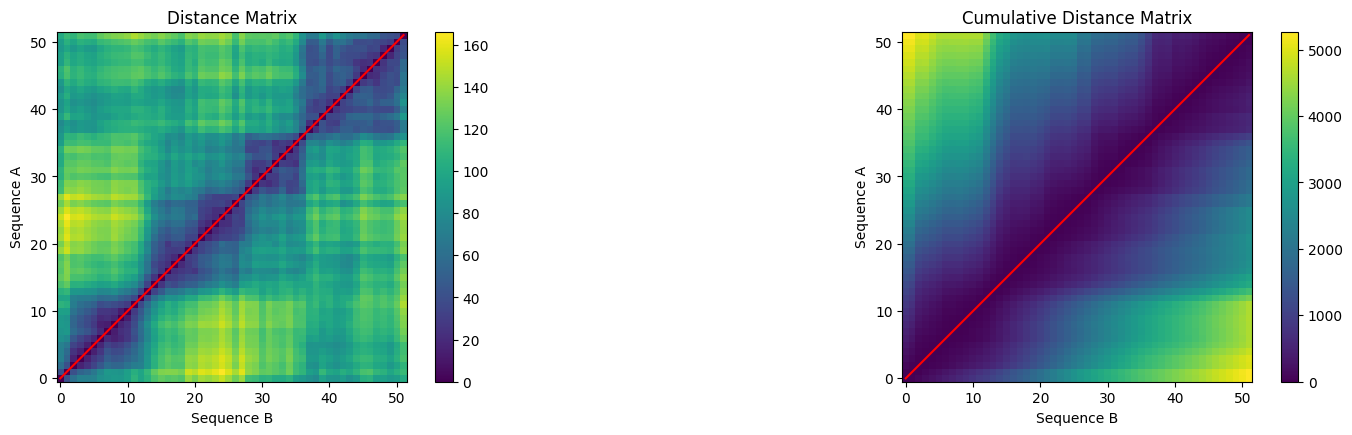

Testing for pair: ('0', '1')


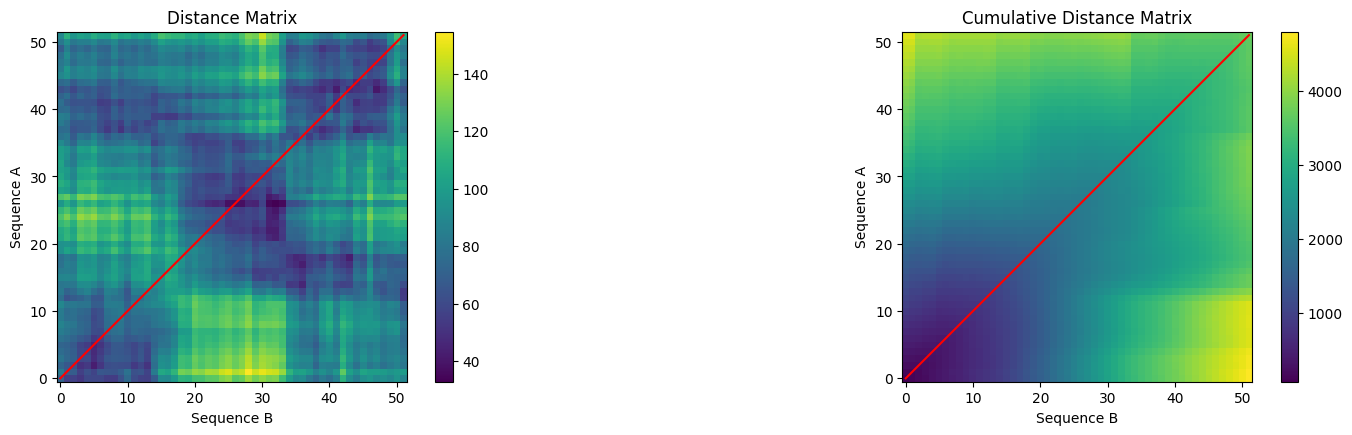

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def compute_mfcc(file_path):
    (rate, sig) = wav.read(file_path)
    sig = sig - np.mean(sig)
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
    return mfcc_feat_cmvn

def estimate_digit(recorded_files, audio_file_path):
    audio_mfcc = compute_mfcc(audio_file_path)
    min_distance = float('inf')
    estimated_digit = None

    for digit, templates in recorded_files.items():
        for template in templates:
            distance = vectorDTW(template, audio_mfcc)[0]

            if distance < min_distance:
                min_distance = distance
                estimated_digit = digit

    return estimated_digit
recorded_files = {
    '0': [compute_mfcc('/content/0_jackson_0.wav')],
    '1': [compute_mfcc('/content/1_jackson_0.wav')],
    '2': [compute_mfcc('/content/2_jackson_0.wav')],
    '3': [compute_mfcc('/content/3_jackson_0.wav')],
    '4': [compute_mfcc('/content/4_jackson_0.wav')],
    '5': [compute_mfcc('/content/5_jackson_0.wav')],
    '6': [compute_mfcc('/content/6_jackson_0.wav')],
    '7': [compute_mfcc('/content/7_jackson_0.wav')],
    '8': [compute_mfcc('/content/8_jackson_0.wav')],
    '9': [compute_mfcc('/content/9_jackson_0.wav')]
}

test_files = {
    '0': ['/content/0_jackson_1.wav', '/content/0_jackson_2.wav', '/content/0_jackson_3.wav'],
    '1': ['/content/1_jackson_1.wav', '/content/1_jackson_2.wav', '/content/1_jackson_3.wav'],
    '2': ['/content/2_jackson_1.wav', '/content/2_jackson_2.wav', '/content/2_jackson_3.wav'],
    '3': ['/content/3_jackson_1.wav', '/content/3_jackson_2.wav', '/content/3_jackson_3.wav'],
    '4': ['/content/4_jackson_1.wav', '/content/4_jackson_2.wav', '/content/4_jackson_3.wav'],
    '5': ['/content/5_jackson_1.wav', '/content/5_jackson_2.wav', '/content/5_jackson_3.wav'],
    '6': ['/content/6_jackson_1.wav', '/content/6_jackson_2.wav', '/content/6_jackson_3.wav'],
    '7': ['/content/7_jackson_1.wav', '/content/7_jackson_2.wav', '/content/7_jackson_3.wav'],
    '8': ['/content/8_jackson_1.wav', '/content/8_jackson_2.wav', '/content/8_jackson_3.wav'],
    '9': ['/content/9_jackson_1.wav', '/content/9_jackson_2.wav', '/content/9_jackson_3.wav']
}

pairs = [
    ('0', '0'),
    ('0', '1')
]

for pair in pairs:
    template1 = recorded_files[pair[0]][0]
    template2 = compute_mfcc(test_files[pair[1]][0])

    print(f"Testing for pair: {pair}")
    plotDTWpath(template1, template2)



**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

Accuracy: 90.00%


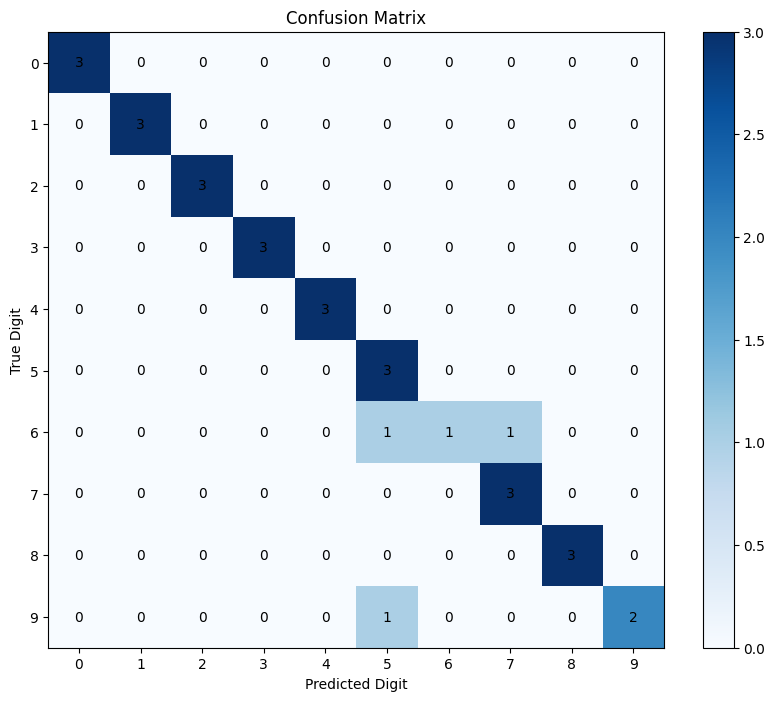

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

confusion_matrix = np.zeros((10, 10))

for true_digit, files in test_files.items():
    for audio_file_path in files:
        estimated_digit = estimate_digit(recorded_files, audio_file_path)
        confusion_matrix[int(true_digit), int(estimated_digit)] += 1

###########################################################
# Calculate and display accuracy
###########################################################
correct_predictions = np.sum(np.diag(confusion_matrix))
total_predictions = np.sum(confusion_matrix)

accuracy = (correct_predictions / total_predictions) * 100

print(f'Accuracy: {accuracy:.2f}%')

###########################################################
# Create and display confusion matrix
###########################################################
plt.figure(figsize=(10, 8))
plt.imshow(confusion_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.ylabel('True Digit')
plt.xlabel('Predicted Digit')
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(int(confusion_matrix[i, j])), ha='center', va='center', color='black')

plt.show()


<b> Report your observations </b>

1.The accuracy in prediction is very good (90% accurate)

2.The most misrecongnized number is 6 as we can we see in the confusion matrix above

3.Shortest path for the considered example is same but the distance isn't (is incase less for 0,0 than in case of 0,1)




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

Mounted at /content/drive
Speakers: ['jackson', 'nicolas', 'yweweler', 'theo']
case1:performance in case of same speaker


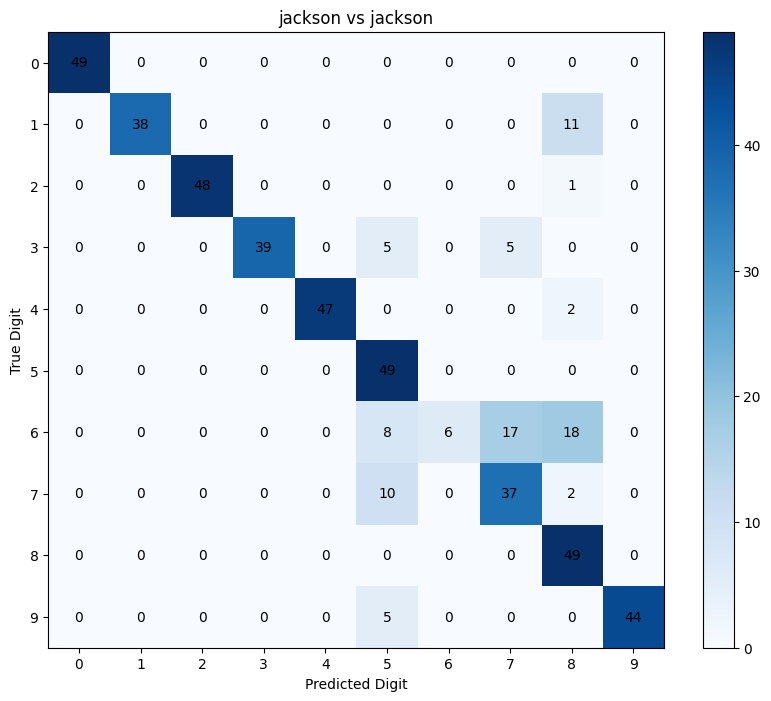

Accuracy: 82.86%
case2:performance in case of different speaker


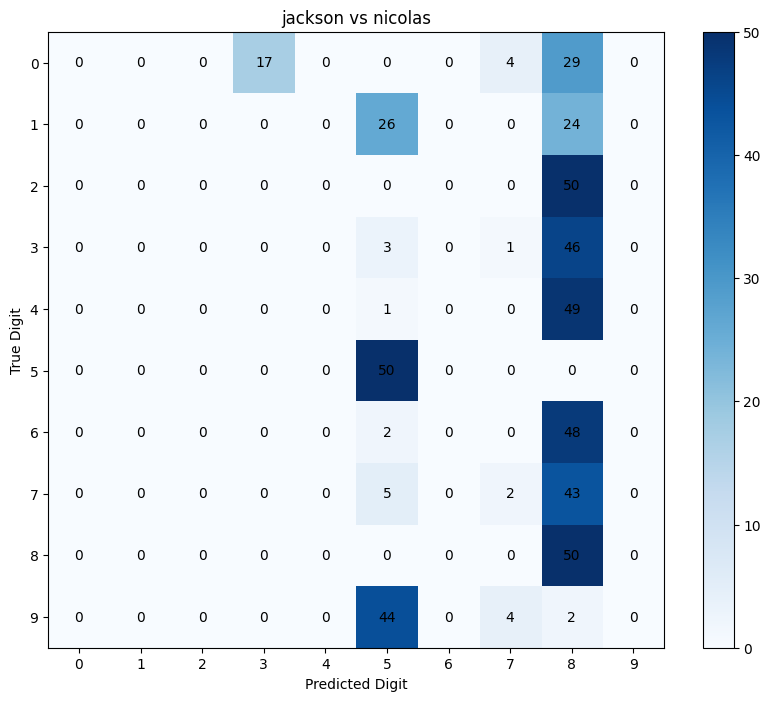

Accuracy: 20.40%


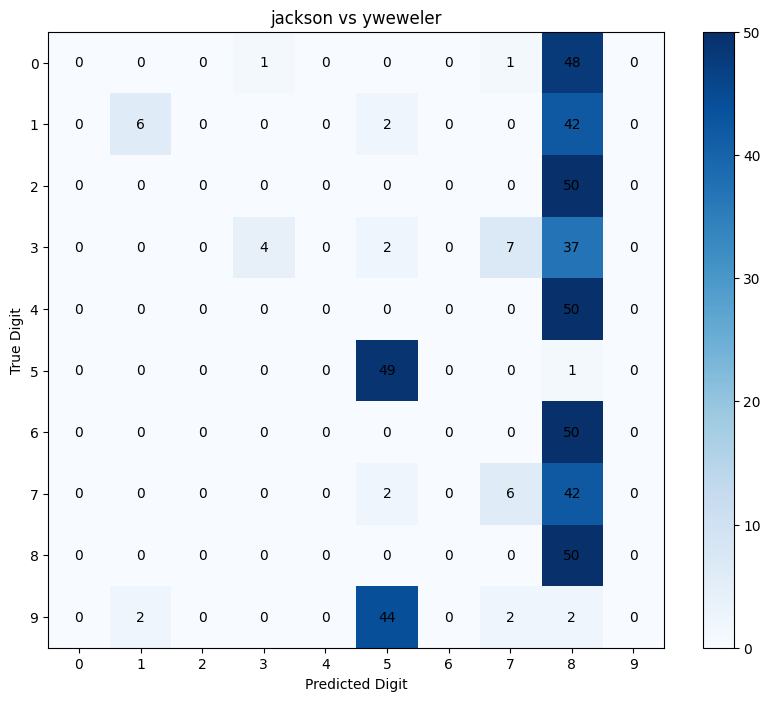

Accuracy: 23.00%


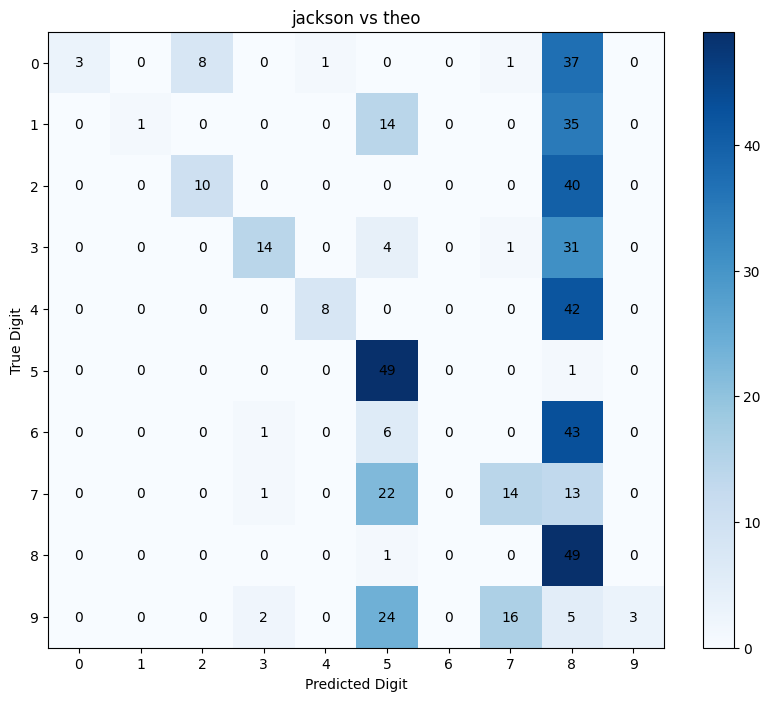

Accuracy: 30.20%
case1:performance in case of same speaker


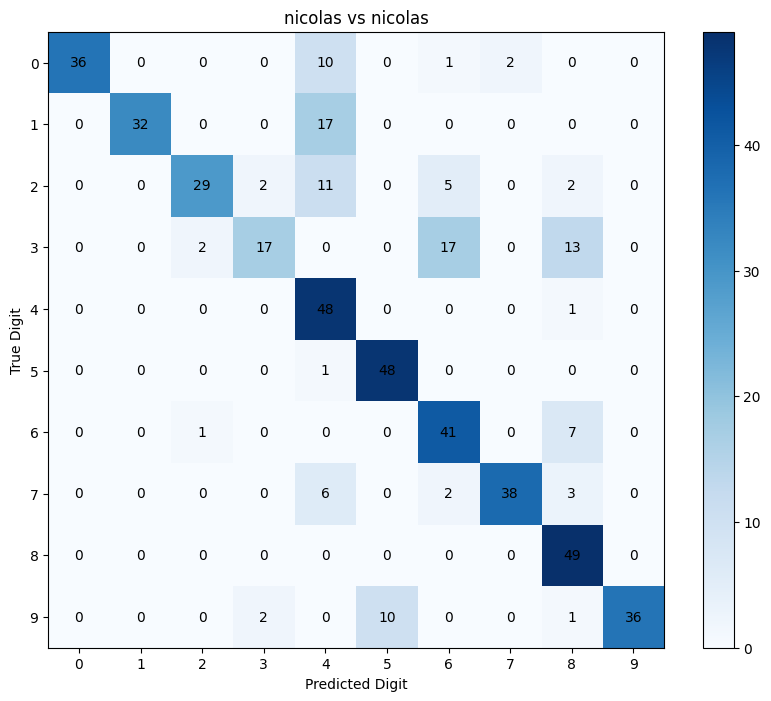

Accuracy: 76.33%
case2:performance in case of different speaker


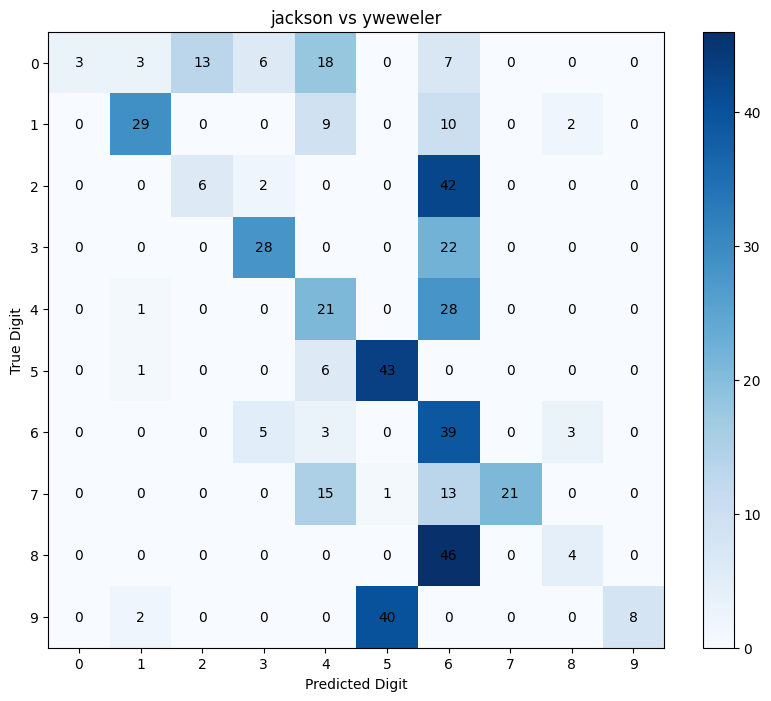

Accuracy: 40.40%


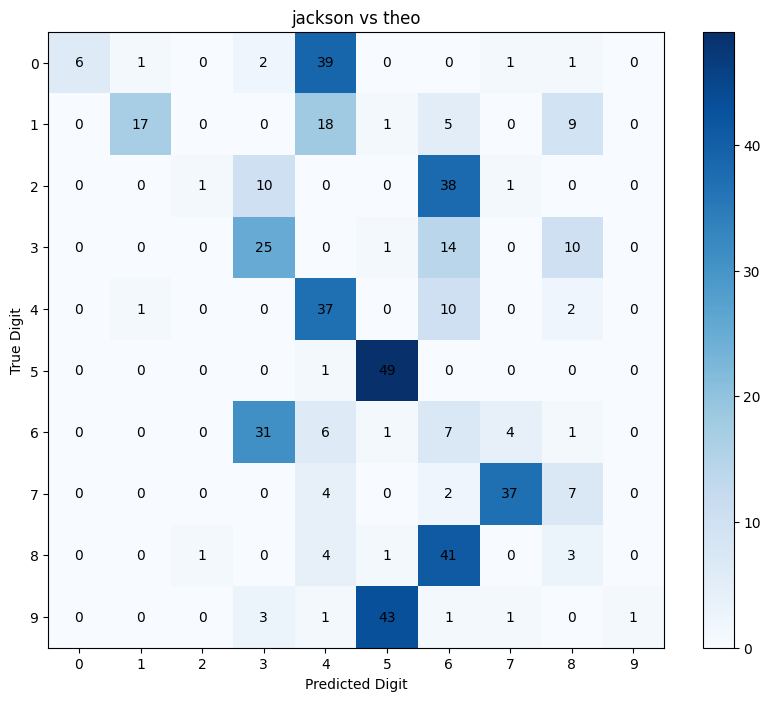

Accuracy: 36.60%
case1:performance in case of same speaker


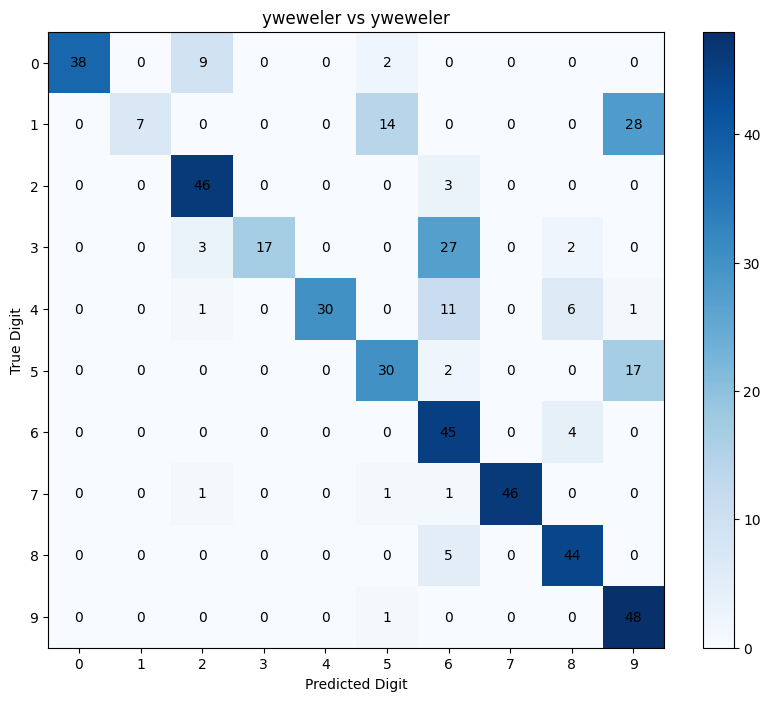

Accuracy: 71.63%
case2:performance in case of different speaker


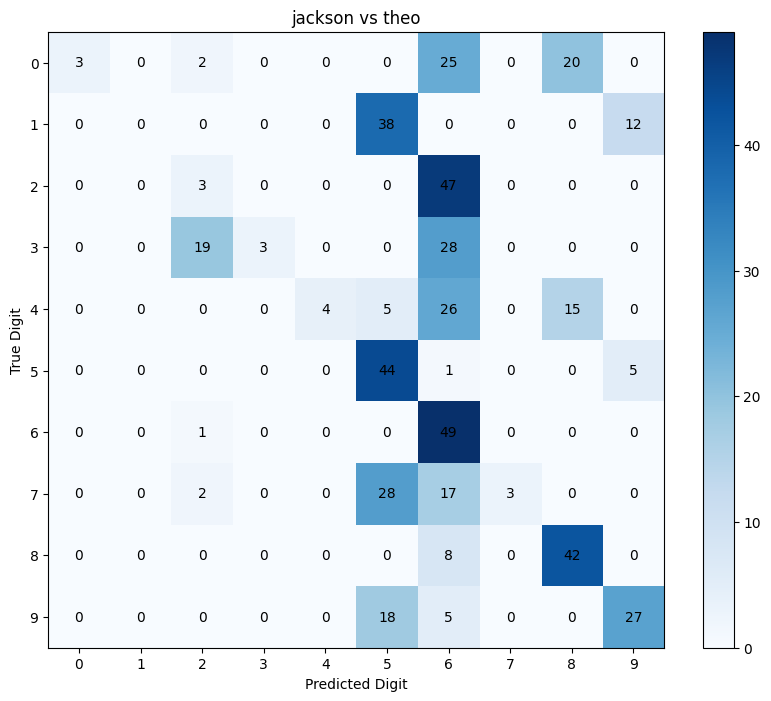

Accuracy: 35.60%
case1:performance in case of same speaker


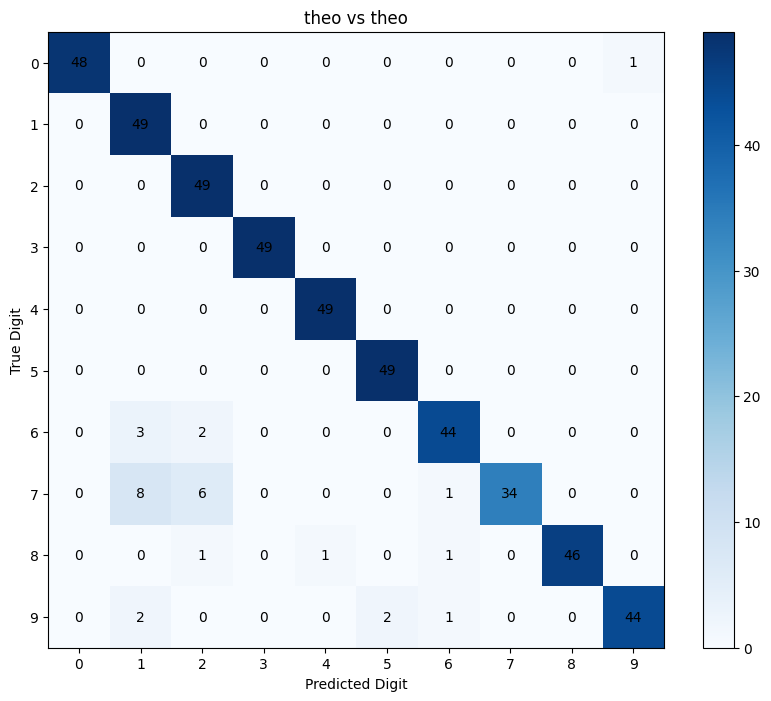

Accuracy: 94.08%
case2:performance in case of different speaker


In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)


# Define the path to the TDIGITS folder on your Google Drive
drive_path = '/content/drive/My Drive/MultiSpeakerDigitData_temp/MultiSpeakerDigitData_modified/'

# List directories in the TDIGITS folder
speaker_dirs = [d for d in os.listdir(drive_path) if os.path.isdir(os.path.join(drive_path, d))]

# Print the list of speakers
speakers = speaker_dirs
print("Speakers:", speakers)

#Performance evaluation of Isolated digit recognition system on TDIGITS data
speaker0=speakers[0]
train_paths = [os.path.join(drive_path, example_speaker, f"{i}_{speaker0}_0.wav") for i in range(10)]






#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker
for p in range(4):
  print('case1:performance in case of same speaker')
  example_speaker = speakers[p]

# Create file paths
  train_paths = {str(i): [compute_mfcc(os.path.join(drive_path, example_speaker, f"{i}_{example_speaker}_0.wav"))] for i in range(10)}

  recorded_files = {
    '0': [compute_mfcc(drive_path+example_speaker+f'/0_{example_speaker}_{i+1}.wav') for i in range(49)],
    '1': [compute_mfcc(drive_path+example_speaker+f'/1_{example_speaker}_{i+1}.wav') for i in range(49)],
    '2': [compute_mfcc(drive_path+example_speaker+f'/2_{example_speaker}_{i+1}.wav') for i in range(49)],
    '3': [compute_mfcc(drive_path+example_speaker+f'/3_{example_speaker}_{i+1}.wav') for i in range(49)],
    '4': [compute_mfcc(drive_path+example_speaker+f'/4_{example_speaker}_{i+1}.wav') for i in range(49)],
    '5': [compute_mfcc(drive_path+example_speaker+f'/5_{example_speaker}_{i+1}.wav') for i in range(49)],
    '6': [compute_mfcc(drive_path+example_speaker+f'/6_{example_speaker}_{i+1}.wav') for i in range(49)],
    '7': [compute_mfcc(drive_path+example_speaker+f'/7_{example_speaker}_{i+1}.wav') for i in range(49)],
    '8': [compute_mfcc(drive_path+example_speaker+f'/8_{example_speaker}_{i+1}.wav') for i in range(49)],
    '9': [compute_mfcc(drive_path+example_speaker+f'/9_{example_speaker}_{i+1}.wav') for i in range(49)]
  }



# Compute confusion matrix
  confusion_matrix = np.zeros((10, 10))

# Populate the confusion matrix
  for i, test_files in enumerate(recorded_files.values()):
      true_digit = str(i)
      for test_mfcc in test_files:
          estimated_digit = estimate_digit(train_paths, test_mfcc)
          confusion_matrix[int(true_digit), int(estimated_digit)] += 1

# Calculate accuracy
  correct_predictions = np.sum(np.diag(confusion_matrix))
  total_predictions = np.sum(confusion_matrix)
  accuracy = (correct_predictions / total_predictions) * 100

# Plot confusion matrix
  plt.figure(figsize=(10, 8))
  plt.imshow(confusion_matrix, cmap='Blues')
  plt.title(example_speaker+' vs ' +example_speaker)
  plt.colorbar()
  tick_marks = np.arange(10)
  plt.xticks(tick_marks, range(10))
  plt.yticks(tick_marks, range(10))
  plt.ylabel('True Digit')
  plt.xlabel('Predicted Digit')
  for i in range(10):
      for j in range(10):
          plt.text(j, i, str(int(confusion_matrix[i, j])), ha='center', va='center', color='black')

  plt.show()

  print(f'Accuracy: {accuracy:.2f}%')







#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
  print('case2:performance in case of different speaker')

  for k in range(p+1,4):
    example_speaker1 = speakers[k]

    recorded_files = {
        '0': [compute_mfcc(drive_path+example_speaker1+f'/0_{example_speaker1}_{i}.wav') for i in range(50)],
      '1': [compute_mfcc(drive_path+example_speaker1+f'/1_{example_speaker1}_{i}.wav') for i in range(50)],
      '2': [compute_mfcc(drive_path+example_speaker1+f'/2_{example_speaker1}_{i}.wav') for i in range(50)],
      '3': [compute_mfcc(drive_path+example_speaker1+f'/3_{example_speaker1}_{i}.wav') for i in range(50)],
    '4': [compute_mfcc(drive_path+example_speaker1+f'/4_{example_speaker1}_{i}.wav') for i in range(50)],
    '5': [compute_mfcc(drive_path+example_speaker1+f'/5_{example_speaker1}_{i}.wav') for i in range(50)],
    '6': [compute_mfcc(drive_path+example_speaker1+f'/6_{example_speaker1}_{i}.wav') for i in range(50)],
    '7': [compute_mfcc(drive_path+example_speaker1+f'/7_{example_speaker1}_{i}.wav') for i in range(50)],
    '8': [compute_mfcc(drive_path+example_speaker1+f'/8_{example_speaker1}_{i}.wav') for i in range(50)],
    '9': [compute_mfcc(drive_path+example_speaker1+f'/9_{example_speaker1}_{i}.wav') for i in range(50)]
   }

    confusion_matrix = np.zeros((10, 10))

# Populate the confusion matrix
    for i, test_files in enumerate(recorded_files.values()):
        true_digit = str(i)
        for test_mfcc in test_files:
            estimated_digit = estimate_digit(train_paths, test_mfcc)
            confusion_matrix[int(true_digit), int(estimated_digit)] += 1

# Calculate accuracy
    correct_predictions = np.sum(np.diag(confusion_matrix))
    total_predictions = np.sum(confusion_matrix)
    accuracy = (correct_predictions / total_predictions) * 100

# Plot confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_matrix, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.ylabel('True Digit')
    plt.xlabel('Predicted Digit')
    plt.title(speakers[0]+' vs '+speakers[k])
    for i in range(10):
        for j in range(10):
            plt.text(j, i, str(int(confusion_matrix[i, j])), ha='center', va='center', color='black')

    plt.show()

    print(f'Accuracy: {accuracy:.2f}%')









#Suggest some of the changes to improve the system performance.









<b> Report your observations </b>

1.**Same Speaker Case:**

Accuracy: The accuracy for the same speaker can be expected to be higher since the DTW algorithm would perform better in recognizing digits when the template and test sequences are from the same speaker.

Observation: The DTW algorithm is likely to perform better in recognizing digits from the same speaker due to the similarity in pronunciation and speaking style.

2.**Different Speaker Case:**

Accuracy: The accuracy for different speakers can be expected to be lower since the DTW algorithm might struggle to recognize digits when the template and test sequences are from different speakers.

Observation: The DTW algorithm is likely to face challenges in recognizing digits from different speakers due to variations in pronunciation and speaking style.

3.**methods to improve the accuracy:**

**Normalization:** Normalize the sequences to have zero mean and unit variance before computing the DTW to make the algorithm more robust to scaling.

**Parameter Tuning:** Optimize the parameters like the window size in DTW to improve performance.

**Speaker Normalization:** Account for speaker variability by using speaker normalization techniques.

